# Project Akhir Data Mining



*   Diah Ayu Puspasari (0110223052)
*   Eka Kartini (0110223054)
*   Nurhayati (0110223081)
*   Pathi (0110223068)



Data Engineering 02





# Start

In [ ]:
# mengimport librari yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
# menghubungkan dengan gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Business Understanding

In [ ]:
# membaca file excel dari gdrive
mydata = pd.read_excel('/content/drive/MyDrive/praktikum_dm/.Project_Akhir/dataset_fix.xlsx')
mydata.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,NaN,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


Business Understanding dalam konteks dataset ini bertujuan untuk memahami bagaimana data tersebut dapat digunakan untuk menjawab pertanyaan atau mendukung tujuan bisnis. Berdasarkan isi data yang ditampilkan, berikut adalah penjelasannya:

- **transaction_id**: ID unik untuk setiap transaksi.
- **transaction_date** dan **transaction_time**: Tanggal dan waktu transaksi dilakukan.
- **transaction_qty**: Jumlah produk yang dibeli dalam transaksi.
- **store_id** dan **store_location**: Identitas dan lokasi toko tempat transaksi terjadi.
- **product_id**, **unit_price**, **product_category**, **product_type**, dan **product_detail**: Informasi detail tentang produk, termasuk kategori, tipe, dan harga satuan.


# Data Understanding

In [ ]:
# mengecek typedata
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153624 entries, 0 to 153623
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    153624 non-null  int64  
 1   transaction_date  153624 non-null  object 
 2   transaction_time  153624 non-null  object 
 3   transaction_qty   151931 non-null  float64
 4   store_id          153624 non-null  int64  
 5   store_location    153624 non-null  object 
 6   product_id        153624 non-null  int64  
 7   unit_price        153624 non-null  float64
 8   product_category  153624 non-null  object 
 9   product_type      153624 non-null  object 
 10  product_detail    153624 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 12.9+ MB


Berikut adalah penjelasan mengenai setiap kolom dalam dataset:

1. **transaction_id**: Kolom ini digunakan untuk memastikan setiap transaksi bersifat individual dan tidak ada duplikasi.
2. **transaction_date**: Kolom ini digunakan untuk menganalisis pola penjualan berdasarkan hari, bulan, atau musim.
3. **transaction_time**: Kolom ini digunakan untuk menyimpan waktu spesifik transaksi dilakukan dan melihat pola pembelian berdasarkan waktu, seperti jam sibuk atau waktu dengan penjualan tertinggi.
4. **transaction_qty**: Kolom ini digunakan untuk menunjukkan jumlah produk yang dibeli dalam satu transaksi dan membantu memahami volume penjualan serta pola pembelian.
5. **store_id**: Kolom ini digunakan untuk analisis performa toko, seperti toko mana yang memiliki penjualan terbaik.
6. **store_location**: Kolom ini digunakan untuk menyimpan lokasi toko tempat transaksi dilakukan. Membantu dalam memahami pengaruh lokasi terhadap penjualan, seperti area dengan performa terbaik.
7. **product_id**: Kolom ini digunakan utnuk identifikasi unik untuk setiap produk yang dijual. Memastikan produk dapat dianalisis secara spesifik, seperti frekuensi penjualan berdasarkan ID produk.
8. **unit_price**: Kolom ini digunakan untuk analisis pendapatan, margin keuntungan, atau strategi penentuan harga.
9. **product_category**: Kolom ini menunjukkan kategori produk (misalnya, kopi, teh, cokelat). Membantu dalam analisis preferensi pelanggan terhadap kategori tertentu.
10. **product_type**: Kolom ini memberikan deskripsi tipe produk yang lebih detail di dalam kategori (misalnya, kopi gourmet, teh brewed). Berguna untuk analisis produk yang lebih spesifik.
11. **product_detail**: Kolom ini menyediakan informasi rinci tentang produk (misalnya, nama varian atau spesifikasi). Membantu dalam analisis tren berdasarkan varian produk tertentu.

In [ ]:
# mencari hasil dari statistika deskriptif kolom float
mydata.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,153624.000000,151931.000000,153624.000000,153624.000000,153624.000000
mean,74739.220682,1.438192,5.341398,47.924530,130.546466
std,43152.474111,0.542150,2.074204,17.935054,1120.990539
min,1.000000,1.000000,3.000000,1.000000,-10.000000
25%,37351.750000,1.000000,3.000000,33.000000,2.500000
50%,74721.500000,1.000000,5.000000,47.000000,3.000000
75%,112091.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,9999.000000


Kesimpulan dari data statistik ini menunjukkan bahwa dataset ini memiliki beberapa masalah yang perlu dibersihkan sebelum analisis lebih lanjut. Kolom **unit_price** mengandung nilai tidak wajar, seperti harga negatif (-10) dan outlier yang sangat tinggi (9,999), yang memerlukan investigasi lebih lanjut. Selain itu, kolom **transaction_qty** memiliki 1,693 nilai hilang, yang harus ditangani melalui imputasi atau penghapusan. Meskipun kolom lain seperti **transaction_id**, **store_id**, dan **product_id** terlihat konsisten, data tetap memerlukan proses pembersihan untuk memastikan keakuratan analisis. Dengan langkah-langkah pembersihan yang tepat, dataset ini dapat digunakan secara efektif untuk memahami pola penjualan dan mendukung pengambilan keputusan bisnis.

# Data Preparation

## Mengatasi Missing Value pada kolom

In [ ]:
# mengecek missing value
missing_value = mydata.isnull().sum()
missing_value

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,1693
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
#meghitung ratio missing value pada kolom
rasio = missing_value.div(len(mydata))
rasio

,0
transaction_id,0.00000
transaction_date,0.00000
transaction_time,0.00000
transaction_qty,0.01102
store_id,0.00000
store_location,0.00000
product_id,0.00000
unit_price,0.00000
product_category,0.00000
product_type,0.00000


In [ ]:
# Mengisi nilai missing dengan median
median_value = mydata['transaction_qty'].median()
mydata['transaction_qty'].fillna(median_value, inplace=True)

<ipython-input-8-05db00b995a8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['transaction_qty'].fillna(median_value, inplace=True)


In [ ]:
# mengecek missing value
missing_value = mydata.isnull().sum()
missing_value

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


Langkah ini mengatasi missing value pada kolom transaction_qty dengan jumlah 1693 baris atau sekitar 1,1% dari total data. Untuk mengatasi hal ini, dilakukan inputasi dengan mengganti nilai koson pada kolom tersebut menggunakan nilai median. Setelah proses ini, dilakukan pengecekan kembali menggunakan metode isnull().sum() untuk memastikan bahwa tidak ada lagi nilai kosong di semua kolom.Hasil pengecekan menunjukkan bahwa dataset kini telah bersih dari missing value,sehingga siap untuk digunakan dalam analisis lebih lanjut tanpa adanya kendala data yang hilang. Pendekatan ini memastikan data tetap valid dan konsisten tanpa menghapus baris yang berisi informasi penting lainnya.

## Mengatasi Data Duplikat

In [ ]:
# Menemukan baris duplikat
duplicates = mydata[mydata.duplicated()]
print(duplicates)

        transaction_id transaction_date transaction_time  transaction_qty  \
149116          116867       2023-06-03         14:04:38              2.0   
149117          119521       2023-06-05         17:41:39              1.0   
149118          105519       2023-05-23         16:56:17              3.0   
149119           29542       2023-02-21         15:40:56              3.0   
149121           27954       2023-02-19         08:25:31              1.0   
...                ...              ...              ...              ...   
153619           55121       2023-04-01         09:53:49              1.0   
153620          121955       2023-06-08         07:18:21              1.0   
153621           64662       2023-04-12         11:12:20              1.0   
153622           62836       2023-04-10         09:47:20              2.0   
153623           92919       2023-05-12         12:49:53              2.0   

        store_id   store_location  product_id  unit_price product_category 

In [ ]:
duplicates_with_diff = mydata[mydata.duplicated(keep=False)]
print(duplicates_with_diff.loc[duplicates_with_diff['transaction_id'] == 116867])

        transaction_id transaction_date transaction_time  transaction_qty  \
116605          116867       2023-06-03         14:04:38              2.0   
149116          116867       2023-06-03         14:04:38              2.0   

        store_id   store_location  product_id  unit_price product_category  \
116605         5  Lower Manhattan          38        3.75           Coffee   
149116         5  Lower Manhattan          38        3.75           Coffee   

            product_type product_detail  
116605  Barista Espresso          Latte  
149116  Barista Espresso          Latte  


In [ ]:
# Hapus duplikat dan simpan dataset bersih
data_bersih = mydata.drop_duplicates()

# Cek jumlah data setelah pembersihan
print("Jumlah data setelah pembersihan:", data_bersih.shape)


Jumlah data setelah pembersihan: (149907, 11)


Proses ini penghapusan duplikat pada dataset ini menunjukkan bahwa terdapat 3,717 baris duplikat dari total data. duplikat tersebut terdeteksi dengan membandingkan seluruh kolom dalam DataFrame, termasuk kolom-kolom seperti transaction_id, store_id, product_type, dan product_detail. Baris-baris duplikat ini, jika tidak dibersihkan, dapat memberikan hasil analisis yang bias, seperti penghitungan total penjualan atau analisis performa produk yang tidak akurat. Setelah dilakukan proses penghapusan duplikat dengan metode  drop_duplicates(), dataset menjadi  lebih bersih dengan hanya menyisakan data unik untuk setiap transaksi. Langkah ini sangat penting untuk memastikan akurasi data, kualitas informasi dan efesiensi analisis.
Kesimpulannya proses pembersihan data ini membantu menciptakan dasar yang kuat untuk analisis lanjutan, seperti penentuan produk terlaris, lokasi dengan performa terbaik, atau  evaluasi Harga produk.

## Menangani Outliers

In [ ]:
# mengecek outlier pada semua kolom dataset
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterasi melalui setiap kolom numerik dalam DataFrame
for col in mydata.select_dtypes(include=np.number):
    outliers = detect_outliers_iqr(mydata[col])
    print(f"Outliers in column '{col}':")
    print(outliers)
    print("-" * 20)

Outliers in column 'transaction_id':
Series([], Name: transaction_id, dtype: int64)
--------------------
Outliers in column 'transaction_qty':
4163      4.0
4352      4.0
9310      8.0
9365      8.0
16490     4.0
21416     4.0
21532     4.0
38494     4.0
38550     4.0
38707     4.0
38953     4.0
39176     6.0
60777     4.0
61057     4.0
61317     4.0
61622     6.0
68806     8.0
68981     8.0
87847     4.0
87987     4.0
88557     4.0
88616     4.0
94332     4.0
97979     8.0
98275     8.0
122099    4.0
122390    4.0
122715    4.0
122799    4.0
123153    4.0
123186    6.0
129128    4.0
133186    8.0
133337    8.0
133407    8.0
148702    8.0
Name: transaction_qty, dtype: float64
--------------------
Outliers in column 'store_id':
Series([], Name: store_id, dtype: int64)
--------------------
Outliers in column 'product_id':
Series([], Name: product_id, dtype: int64)
--------------------
Outliers in column 'unit_price':
11         -10.0
92        9999.0
128       9999.0
185       9999.0
203

### Outlies Pada Kolom transaction_qty


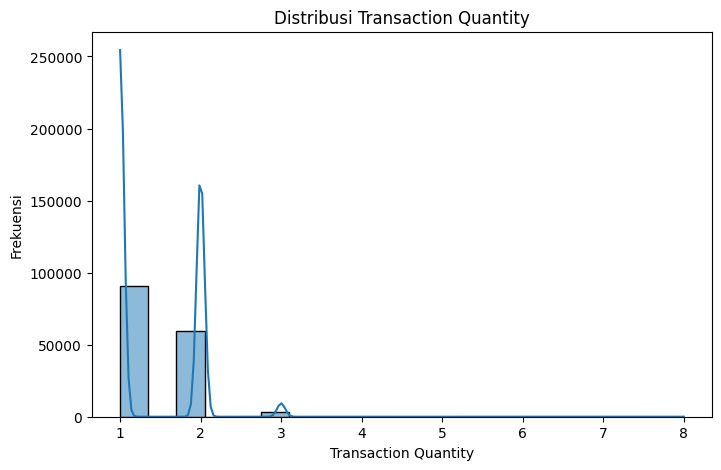

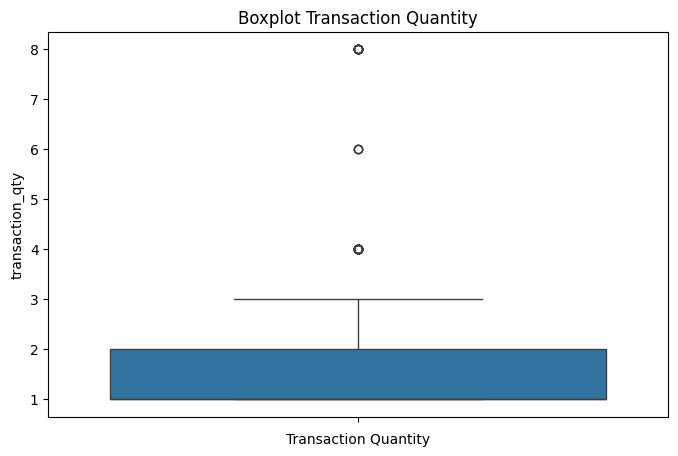

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(mydata['transaction_qty'], bins=20, kde=True)
plt.title('Distribusi Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(mydata['transaction_qty'])
plt.title('Boxplot Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.show()

In [ ]:
# menangani outliers
median_qty = mydata['transaction_qty'].median()

# Calculate lower_bound and upper_bound here
Q1 = mydata['transaction_qty'].quantile(0.25)
Q3 = mydata['transaction_qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mydata['transaction_qty'] = mydata['transaction_qty'].apply(lambda x: median_qty if x < lower_bound or x > upper_bound else x)

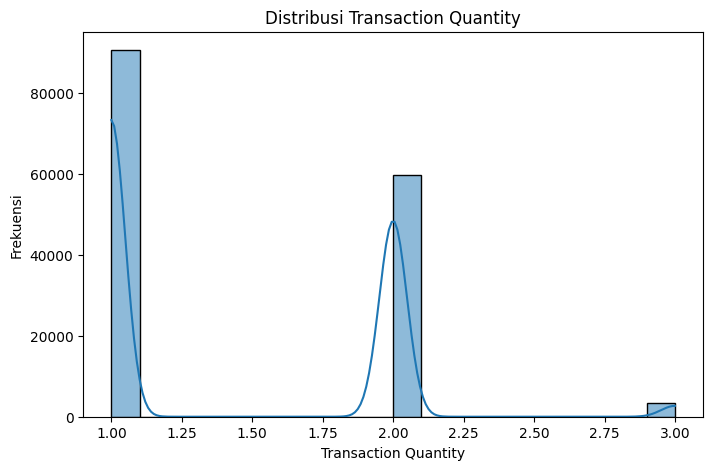

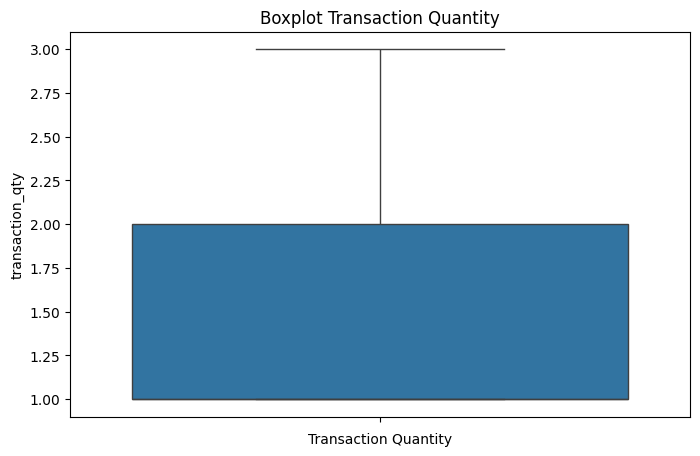

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(mydata['transaction_qty'], bins=20, kde=True)
plt.title('Distribusi Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(mydata['transaction_qty'])
plt.title('Boxplot Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.show()

Outliers pada kolom transaction_qty

Pada tahap awal pengecekan outliers pada kolom *transaction_qty*, ditemukan bahwa mayoritas transaksi berada pada nilai 1 dan 2, yang menunjukkan pola transaksi sederhana. Namun, terdapat beberapa nilai outliers, yaitu transaksi dengan jumlah 4, 6, dan 8, yang berada di luar rentang interkuartil (IQR) dan memiliki frekuensi yang sangat kecil. Kehadiran nilai ekstrem ini menunjukkan adanya penyimpangan yang dapat memengaruhi hasil analisis jika dibiarkan. Untuk mengatasi masalah ini, dilakukan penanganan dengan mengganti nilai outliers menggunakan median. Pendekatan ini dipilih karena median lebih tahan terhadap pengaruh nilai ekstrem dan dapat menjaga distribusi data tetap stabil tanpa mengubah pola utama. Setelah penanganan, data menjadi lebih bersih dan distribusinya lebih seragam, tanpa adanya nilai-nilai yang menyimpang. Mayoritas transaksi tetap terpusat pada nilai 1 dan 2, mencerminkan pola distribusi asli yang tetap terjaga. Dengan data yang telah diperbaiki ini, analisis lanjutan dapat dilakukan dengan hasil yang lebih akurat dan representatif, tanpa terganggu oleh pengaruh nilai ekstrem.

### Outliers Pada Kolom unit_price

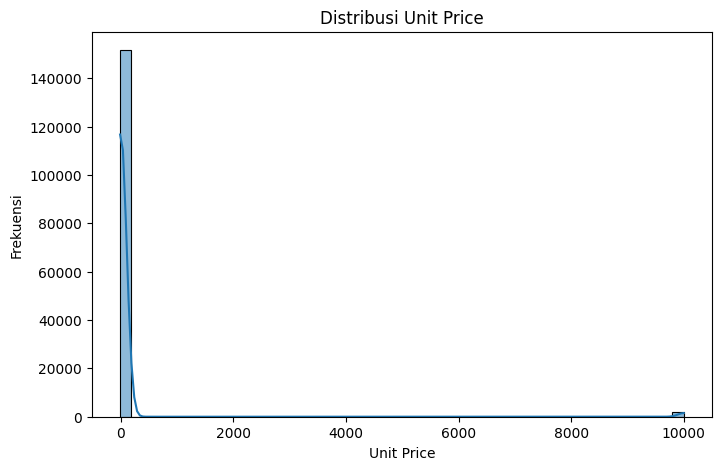

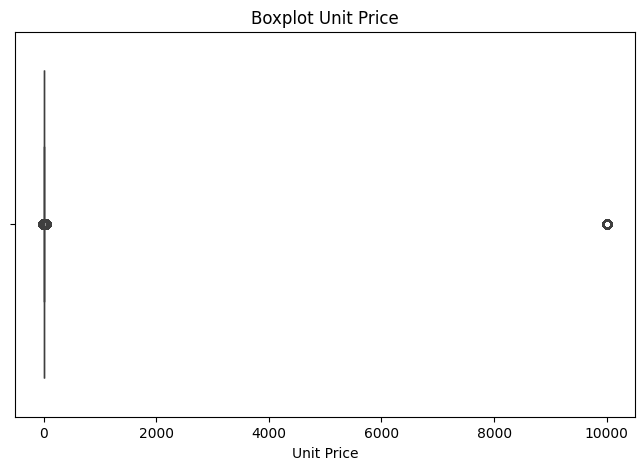

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(mydata['unit_price'], bins=50, kde=True)
plt.title('Distribusi Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=mydata['unit_price'])
plt.title('Boxplot Unit Price')
plt.xlabel('Unit Price')
plt.show()

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = mydata['unit_price'].quantile(0.25)
Q3 = mydata['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Data outlier
outliers = mydata[(mydata['unit_price'] < lower_bound) | (mydata['unit_price'] > upper_bound)]
print(outliers)

Batas bawah: 0.625, Batas atas: 5.625
        transaction_id transaction_date transaction_time  transaction_qty  \
11                  12       2023-01-01         07:44:35              2.0   
92                  93       2023-01-01         10:27:48              2.0   
128                129       2023-01-01         11:28:29              2.0   
185                186       2023-01-01         12:38:28              2.0   
203                204       2023-01-01         12:52:18              1.0   
...                ...              ...              ...              ...   
153509           39858       2023-03-10         07:08:36              1.0   
153533           70645       2023-04-19         09:00:12              1.0   
153569          129553       2023-06-14         08:54:09              1.0   
153589           26192       2023-02-16         08:40:39              1.0   
153603           50099       2023-03-24         11:36:41              2.0   

        store_id   store_location  pr

In [ ]:
# Menangani nilai negatif dengan menggantinya dengan NaN
mydata['unit_price'] = mydata['unit_price'].apply(lambda x: x if x >= 0 else None)

In [ ]:
# Mengganti nilai ekstrem dengan NaN
upper_limit = 1000  # Tentukan batas harga yang masuk akal
mydata['unit_price'] = mydata['unit_price'].apply(lambda x: x if x <= upper_limit else None)

In [ ]:
# Mengisi nilai NaN dengann median
median_price = mydata['unit_price'].median()
mydata['unit_price'] = mydata['unit_price'].fillna(median_price)

count    153624.000000
mean          3.371454
std           2.619969
min           0.800000
25%           2.500000
50%           3.000000
75%           3.750000
max          45.000000
Name: unit_price, dtype: float64


<Axes: xlabel='unit_price'>

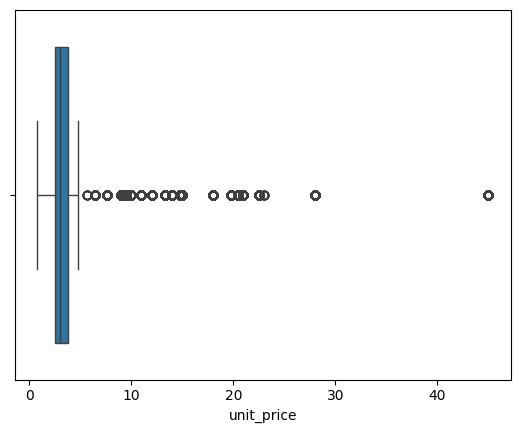

In [ ]:
# Cek Verifikasi Setelah Penanganan
print(mydata['unit_price'].describe())

# Plot ulang untuk memverifikasi
import seaborn as sns
sns.boxplot(x=mydata['unit_price'])

Pada awal analisis, ditemukan bahwa kolom unit_price memiliki distribusi yang sangat miring ke kanan (right-skewed) dengan sebagian besar nilai berada di kisaran rendah. Selain itu, terdapat outliers berupa nilai negatif dan nilai ekstrem yang tidak masuk akal, seperti -10 dan 9999. Berdasarkan perhitungan menggunakan metode IQR, batas bawah ditentukan sebesar 0.625 dan batas atas sebesar 5.625, sehingga nilai di luar rentang ini dikategorikan sebagai outliers. Untuk menangani hal ini, nilai negatif dan nilai ekstrem (>1000) diganti dengan *NaN* agar tidak memengaruhi analisis. Selanjutnya, nilai *NaN* tersebut diisi menggunakan median *unit_price*, yaitu 3.5, karena median lebih tahan terhadap pengaruh outliers. Setelah proses pembersihan, data menjadi lebih wajar dengan nilai maksimum hanya 45 dan rata-rata sekitar 3.37. Verifikasi melalui boxplot menunjukkan distribusi data yang lebih terkonsentrasi tanpa nilai ekstrem yang signifikan. Dengan data yang telah dibersihkan, analisis lebih lanjut dapat dilakukan dengan hasil yang lebih akurat dan dapat diandalkan.

## Mengatasi Invalid Date

In [ ]:
# Ganti tanggal tidak valid dengan nilai default
mydata['transaction_date'] = mydata['transaction_date'].apply(
    lambda x: '2023-01-01' if "INVALID" in str(x) else x
)

In [ ]:
# Konversi ke format datetime
mydata['transaction_date'] = pd.to_datetime(mydata['transaction_date'], errors='coerce')

# Cek jika masih ada nilai NaT (Not a Time)
invalid_after_conversion = mydata[mydata['transaction_date'].isna()]
print("Baris yang masih tidak valid setelah konversi datetime:")
print(invalid_after_conversion)

Baris yang masih tidak valid setelah konversi datetime:
Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, transaction_qty, store_id, store_location, product_id, unit_price, product_category, product_type, product_detail]
Index: []


In [ ]:
# cek type data transaction_date setelah di transformasi
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153624 entries, 0 to 153623
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    153624 non-null  int64         
 1   transaction_date  153624 non-null  datetime64[ns]
 2   transaction_time  153624 non-null  object        
 3   transaction_qty   153624 non-null  float64       
 4   store_id          153624 non-null  int64         
 5   store_location    153624 non-null  object        
 6   product_id        153624 non-null  int64         
 7   unit_price        153624 non-null  float64       
 8   product_category  153624 non-null  object        
 9   product_type      153624 non-null  object        
 10  product_detail    153624 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 12.9+ MB


Kolom *transaction_date* pada dataset telah berhasil ditangani untuk memastikan kualitas dan validitas data. Nilai yang tidak valid, seperti yang mengandung teks "INVALID", diganti dengan tanggal default "2023-01-01" untuk mengatasi masalah ketidaksesuaian data. Setelah itu, kolom tersebut dikonversi ke format datetime menggunakan fungsi *pd.to_datetime(), dengan argumen **errors='coerce'* untuk mengganti nilai yang tidak dapat dikonversi menjadi *NaT* (Not a Time). Validasi lebih lanjut menunjukkan bahwa tidak ada nilai *NaT* yang tersisa setelah proses konversi, memastikan bahwa semua data dalam kolom *transaction_date* sudah valid. Terakhir, tipe data kolom ini berhasil diubah menjadi *datetime64[ns], yang mempermudah analisis berbasis waktu. Dengan transformasi ini, kolom **transaction_date* kini siap digunakan untuk analisis lebih lanjut, seperti pengelompokan data berdasarkan waktu atau identifikasi tren temporal, tanpa gangguan dari data yang tidak valid.

## Menangani Text Errors / Tidak valid

### Text errors pada kolom store_location

In [ ]:
# Cek jumlah masing masing isi dari kolom lokasi store
value_counts = mydata['store_location'].value_counts()
print(value_counts)

store_location
Hell's Kitchen     50669
Astoria            50603
Lower Manhattan    47670
Hel's Kitchen       4682
Name: count, dtype: int64


Dapat dilihat bahwa Hel's Kitchen adalah text error dari Hell's Kitchen

In [ ]:
# Mengganti "Hel's Kitchen" dengan "Hell's Kitche"
mydata['store_location'] = mydata['store_location'].replace("Hel's Kitchen", "Hell's Kitchen")

In [ ]:
# Cek kembali jumlah masing masing isi dari kolom lokasi store
value_counts = mydata['store_location'].value_counts()
print(value_counts)

store_location
Hell's Kitchen     55351
Astoria            50603
Lower Manhattan    47670
Name: count, dtype: int64


1. Pengecekan Awal
- Dilakukan pengecekan terhadap jumlah masing-masing nilai unik dalam kolom store_location.
-Ditemukan bahwa ada dua entri yang mirip: "Hell's Kitchen" (50.669 kali) dan "Hel's Kitchen" (4.682 kali).
-Ini menunjukkan adanya kesalahan penulisan (typo) pada "Hel's Kitchen".

2. Perbaikan Data
- Kode melakukan penggantian "Hel's Kitchen" menjadi "Hell's Kitchen" menggunakan .replace() pada kolom store_location.

3. Pengecekan Setelah Perbaikan
- Setelah perbaikan, "Hell's Kitchen" meningkat menjadi 55.351 (50.669 + 4.682).
- "Hel's Kitchen" sudah tidak ada lagi dalam data.

Kesimpulan:
Kesalahan penulisan "Hel's Kitchen" berhasil diperbaiki dengan menggantinya menjadi "Hell's Kitchen", sehingga data dalam kolom store_location menjadi lebih bersih dan konsisten.

### Invalid Kategori pada kolom product_category

In [ ]:
# Cek jumlah masing masing isi dari kolom product category
value_counts = mydata['product_category'].value_counts()
print(value_counts)

product_category
Coffee                58564
Tea                   45577
Bakery                22945
Drinking Chocolate    11529
Flavours               6840
Unknown                3943
Coffee beans           1775
Loose Tea              1212
Branded                 753
Packaged Chocolate      486
Name: count, dtype: int64


Terdapat Unknown sebesar 3943

In [ ]:
# Mencari kategori yang paling sering muncul
most_category = mydata['product_category'].value_counts().idxmax()
most_category

'Coffee'

In [ ]:
# Mengganti 'Unknown' dengan kategori yang paling sering muncul
mydata.loc[mydata['product_category'] == 'Unknown', 'product_category'] = most_category

In [ ]:
# Cek jumlah masing masing isi dari kolom product category
value_counts = mydata['product_category'].value_counts()
print(value_counts)

product_category
Coffee                62507
Tea                   45577
Bakery                22945
Drinking Chocolate    11529
Flavours               6840
Coffee beans           1775
Loose Tea              1212
Branded                 753
Packaged Chocolate      486
Name: count, dtype: int64


1. Identifikasi Kategori "Unknown"
- Dari hasil value_counts(), terdapat 3.943 data dengan kategori "Unknown" dalam kolom product_category.

2. Menentukan Kategori Terbanyak
- Kategori yang paling sering muncul adalah "Coffee" dengan 58.564 data.

3. Mengganti "Unknown" dengan Kategori Terbanyak
- Semua data yang memiliki kategori "Unknown" diganti dengan "Coffee".

4. Verifikasi Hasil Perubahan
- Setelah perubahan, jumlah kategori "Coffee" meningkat menjadi 62.507 (karena bertambah 3.943 dari kategori "Unknown").
- Kategori "Unknown" berhasil dihapus dari dataset.

Kesimpulan
Proses ini berhasil membersihkan data dengan mengganti kategori "Unknown" menggunakan kategori paling umum, yaitu "Coffee". Hal ini meningkatkan kualitas dataset tanpa menghapus data, membuat analisis lebih akurat, dan memastikan interpretasi hasil yang lebih jelas. Dengan demikian, data menjadi lebih bersih dan lebih dapat diandalkan untuk pengambilan keputusan

# Data Bersih

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153624 entries, 0 to 153623
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    153624 non-null  int64         
 1   transaction_date  153624 non-null  datetime64[ns]
 2   transaction_time  153624 non-null  object        
 3   transaction_qty   153624 non-null  float64       
 4   store_id          153624 non-null  int64         
 5   store_location    153624 non-null  object        
 6   product_id        153624 non-null  int64         
 7   unit_price        153624 non-null  float64       
 8   product_category  153624 non-null  object        
 9   product_type      153624 non-null  object        
 10  product_detail    153624 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 12.9+ MB


In [ ]:
mydata.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,1.0,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
mydata.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,153624.000000,153624,153624.000000,153624.000000,153624.000000,153624.000000
mean,74739.220682,2023-04-13 06:15:49.351663872,1.432361,5.341398,47.924530,3.371454
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37351.750000,2023-03-02 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74721.500000,2023-04-22 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112091.250000,2023-05-29 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,3.000000,8.000000,87.000000,45.000000
std,43152.474111,NaN,0.537237,2.074204,17.935054,2.619969


# Modelling

In [ ]:
# Agregasi data per store_id
store_aggregation = mydata.groupby('store_id').agg(
    total_sales=pd.NamedAgg(column='transaction_qty', aggfunc='sum'),
    transaction_count=pd.NamedAgg(column='transaction_id', aggfunc='count'),
    avg_unit_price=pd.NamedAgg(column='unit_price', aggfunc='mean')
).reset_index()

# Distribusi kategori produk
category_distribution = mydata.groupby(['store_id', 'product_category']).agg(
    category_count=pd.NamedAgg(column='transaction_qty', aggfunc='sum')
).reset_index()

# Pivot kategori untuk clustering
category_pivot = category_distribution.pivot(index='store_id',
                                              columns='product_category',
                                              values='category_count').fillna(0).reset_index()

# Gabungkan hasil agregasi
aggregated_mydata = pd.merge(store_aggregation, category_pivot, on='store_id', how='left')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik untuk clustering
features = aggregated_mydata.drop(columns=['store_id'])

# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans

# Tentukan jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_mydata['cluster'] = kmeans.fit_predict(scaled_features)

# Lihat hasil clustering
print(aggregated_mydata[['store_id', 'cluster']])

   store_id  cluster
0         3        2
1         5        0
2         8        1


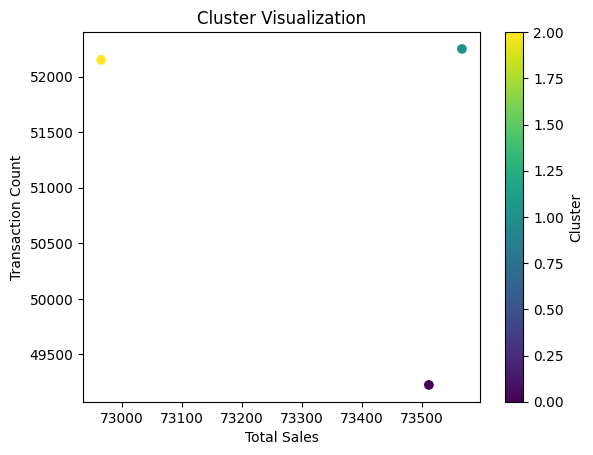

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil clustering berdasarkan dua fitur
plt.scatter(aggregated_mydata['total_sales'],
            aggregated_mydata['transaction_count'],
            c=aggregated_mydata['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Total Sales')
plt.ylabel('Transaction Count')
plt.title('Cluster Visualization')
plt.show()

In [ ]:
# Check if the 'cluster' column exists in the aggregated_data
aggregated_mydata.columns.tolist()

['store_id',
 'total_sales',
 'transaction_count',
 'avg_unit_price',
 'Bakery',
 'Branded',
 'Coffee',
 'Coffee beans',
 'Drinking Chocolate',
 'Flavours',
 'Loose Tea',
 'Packaged Chocolate',
 'Tea',
 'cluster']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the data for clustering
features = aggregated_mydata.drop(columns=['store_id'])  # Exclude non-numeric columns for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_mydata['cluster'] = kmeans.fit_predict(scaled_features)

# Verify if the 'cluster' column is now added
aggregated_mydata.head()

,store_id,total_sales,transaction_count,avg_unit_price,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea,cluster
0,3,72966.0,52150,3.371814,7554.0,284.0,31517.0,509.0,6370.0,2232.0,343.0,111.0,24046.0,2
1,5,73512.0,49225,3.355586,8101.0,358.0,31163.0,538.0,5436.0,4664.0,379.0,181.0,22692.0,0
2,8,73567.0,52249,3.386045,7715.0,119.0,32111.0,732.0,5673.0,3591.0,490.0,194.0,22942.0,1


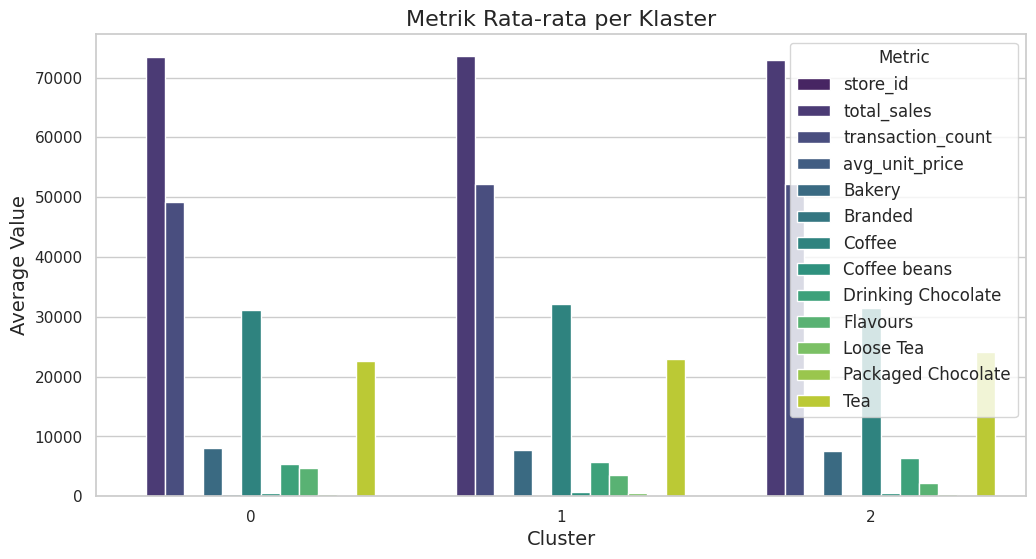

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

cluster_analysis = aggregated_mydata

# Plot 1: Average metrics per cluster
plt.figure(figsize=(12, 6))
# Pass the melted DataFrame directly to 'data'
sns.barplot(data=cluster_analysis.melt(id_vars='cluster', var_name='Metric', value_name='Value'),
            x='cluster', y='Value', hue='Metric', palette='viridis')
plt.title('Metrik Rata-rata per Klaster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.show()

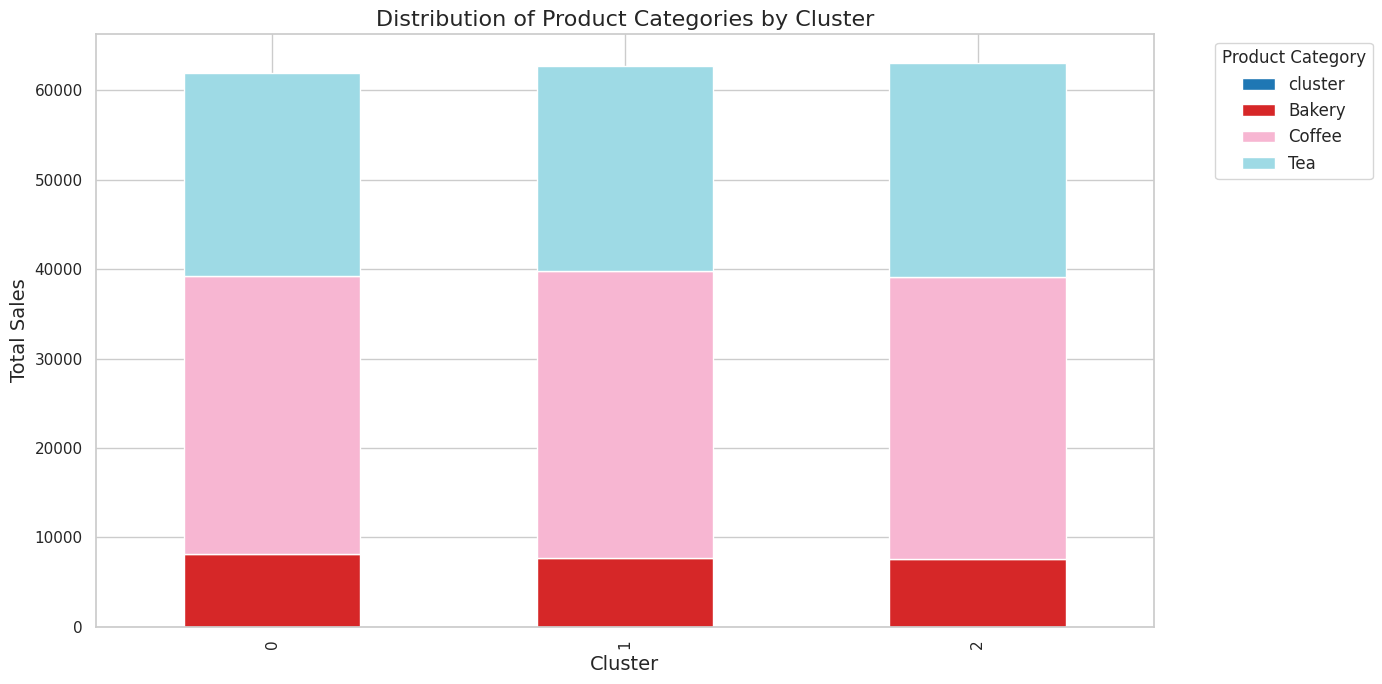

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Set seaborn style
sns.set(style="whitegrid")

cluster_analysis = aggregated_mydata

# Get the actual product category columns present in your DataFrame
product_category_cols = [col for col in aggregated_mydata.columns if col in ['Coffee', 'Tea', 'Bakery', 'Pastry', 'Sandwich', 'Juice', 'Smoothie']]

# Assuming you want to analyze the category distribution within clusters:
category_by_cluster = aggregated_mydata.groupby('cluster')[product_category_cols].sum().reset_index()

# Find the dominant category for each cluster based on total sales
category_by_cluster['dominant_category'] = category_by_cluster[product_category_cols].idxmax(axis=1)

# Plot 2: Dominant product categories per cluster
category_by_cluster_no_dom = category_by_cluster.drop(columns=['dominant_category'])
category_by_cluster_no_dom.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Distribution of Product Categories by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Product Category', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
mydata.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,1.0,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2.0,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1.0,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2.0,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
import numpy as np

# Cek jumlah cluster unik
unique_clusters = np.unique(kmeans.labels_)
print(f"Unique clusters: {unique_clusters}")

Unique clusters: [0 1 2]


# Evaluation

## Menggunakan Silhouette Score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data yang digunakan (tanpa store_id dan cluster)
data_features = aggregated_mydata.drop(columns=['store_id', 'cluster'], errors='ignore')

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# KMeans Clustering with adjusted number of clusters
kmeans = KMeans(n_clusters=2, random_state=42) # Reduced clusters to 2
kmeans.fit(data_scaled)

# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: -0.001


## Menggunakan PCA Visualization of Clusters

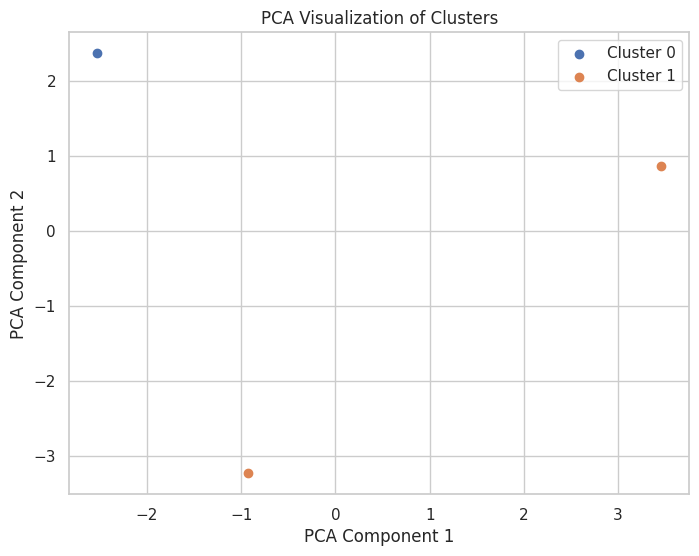

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi data ke 2 dimensi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        data_pca[kmeans.labels_ == cluster, 0],
        data_pca[kmeans.labels_ == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Menggunakan Visualisasi Elbow Method

In [ ]:
print(f"Inertia (SSE): {kmeans.inertia_:.3f}")

Inertia (SSE): 18.003


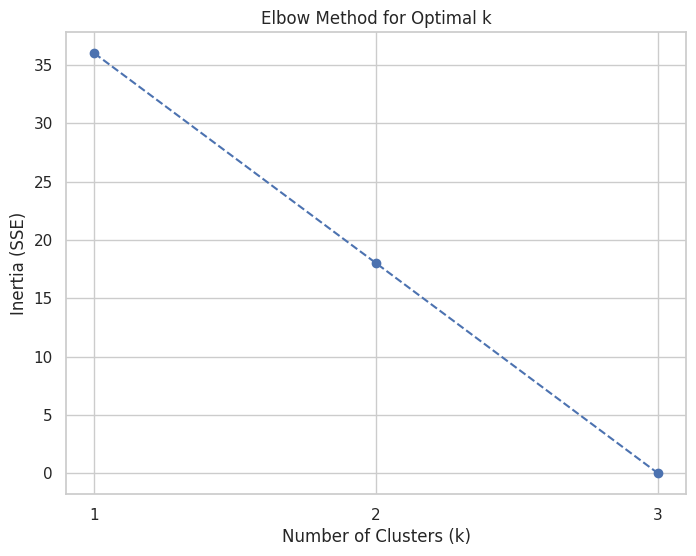

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range jumlah cluster yang diuji
# Change k_values to a maximum of 3 (number of samples)
k_values = range(1, 4)
inertia_values = []

# Hitung inertia untuk setiap nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Menggunakan Davies-Bouldin Index

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Data yang digunakan (tanpa store_id dan cluster)
data_features = aggregated_mydata.drop(columns=['store_id', 'cluster'], errors='ignore')

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# KMeans Clustering with adjusted number of clusters
kmeans = KMeans(n_clusters=2, random_state=42) # Reduced clusters to 2
kmeans.fit(data_scaled)

# Menghitung Davies-Bouldin Index
# Use the same kmeans object with n_clusters=2
db_index = davies_bouldin_score(data_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.3f}")

Davies-Bouldin Index: 0.577
